In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D2search_results_US Economy.csv')
df

,user_country,source,content,date
0,NaN,Twitter for iPhone,@HikindDov @realDonaldTrump What do you want? ...,2020-10-22T23:56:04+00:00
1,"Austin, TX",Twitter for iPhone,This election is all about for whom we want th...,2020-10-22T23:48:18+00:00
2,"Jacksonville Beach, FL",Twitter Web App,Why is sports betting in Florida not legal yet...,2020-10-22T23:45:40+00:00
3,NaN,FS Poster,Jim Watson/AFP via Getty Images; Tasos Katopod...,2020-10-22T23:43:44+00:00
4,"Orlando, FL",Twitter for iPhone,@BowmanNancy @HillaryClinton @dontpanic1955 It...,2020-10-22T23:42:20+00:00
...,...,...,...,...
684,"Missouri, USA",Twitter for iPad,Trump boasts the US economy is the best it's e...,2020-10-22T00:19:12+00:00
685,NaN,Twitter for Android,@JohnCornyn Voting for @JohnCornyn is like vot...,2020-10-22T00:15:12+00:00
686,FAWKES@YAHOO.COM,Twitter Web App,@MaryBittel @senatemajldr $300??? a week. Reme...,2020-10-22T00:13:56+00:00
687,FAWKES@YAHOO.COM,Twitter Web App,@hotracehorse @barricko_bama @senatemajldr At ...,2020-10-22T00:04:52+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

26971
['@hikinddov', '@realdonaldtrump', 'what', 'do', 'you', 'want', '?', 'four', 'more', 'years', 'of', 'unnecessary', 'deaths', 'and', 'a', 'mismanaged', 'economy', '?', 'trump', 'had']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 229.78%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

11795
['want', 'four', 'years', 'unnecessary', 'deaths', 'mismanaged', 'economy', 'trump', 'personal', 'bankruptcies', 'plus', 'years', 'mismanaging', 'virus', 'economy', 'trump', 'deserves', 'fired', 'voters', 'lost']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@realdonaldtrump', 71),
 ('@joebiden', 10),
 ('@gop', 8),
 ('@foxnews', 6),
 ('@ingrahamangle', 5),
 ('@60minutes', 5),
 ('@senatemajldr', 4),
 ('@independent', 4),
 ('@reniemichelle', 4),
 ('@celticguy99', 4),
 ('@justinweaselbe1', 4),
 ('@cnn', 4),
 ('@reuters', 4),
 ('@mike_pence', 3),
 ('@msnbc', 3),
 ('@nypost', 3),
 ('@ddale8', 3),
 ('@facebook', 3),
 ('@twitter', 3),
 ('@potus', 3)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,NaN,Twitter for iPhone,@HikindDov @realDonaldTrump What do you want? ...,2020-10-22T23:56:04+00:00,Positive
1,"Austin, TX",Twitter for iPhone,This election is all about for whom we want th...,2020-10-22T23:48:18+00:00,Positive
2,"Jacksonville Beach, FL",Twitter Web App,Why is sports betting in Florida not legal yet...,2020-10-22T23:45:40+00:00,Negative
3,NaN,FS Poster,Jim Watson/AFP via Getty Images; Tasos Katopod...,2020-10-22T23:43:44+00:00,Neutral
4,"Orlando, FL",Twitter for iPhone,@BowmanNancy @HillaryClinton @dontpanic1955 It...,2020-10-22T23:42:20+00:00,Neutral
...,...,...,...,...,...
684,"Missouri, USA",Twitter for iPad,Trump boasts the US economy is the best it's e...,2020-10-22T00:19:12+00:00,Positive
685,NaN,Twitter for Android,@JohnCornyn Voting for @JohnCornyn is like vot...,2020-10-22T00:15:12+00:00,Negative
686,FAWKES@YAHOO.COM,Twitter Web App,@MaryBittel @senatemajldr $300??? a week. Reme...,2020-10-22T00:13:56+00:00,Negative
687,FAWKES@YAHOO.COM,Twitter Web App,@hotracehorse @barricko_bama @senatemajldr At ...,2020-10-22T00:04:52+00:00,Negative


In [11]:
df.sentiment.value_counts()

Negative    320
Positive    267
Neutral     102
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 38.75%
Percentage of neutral tweets: 14.80%
Percentage of negative tweets: 46.44%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

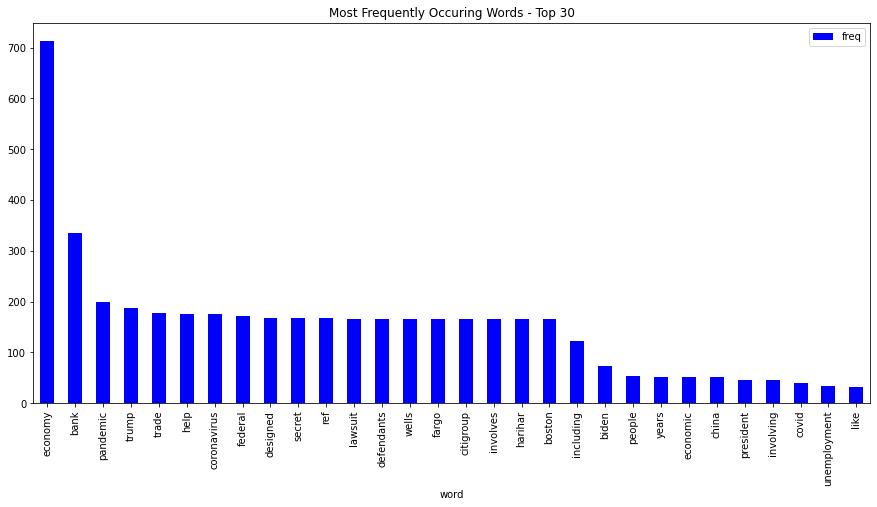

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

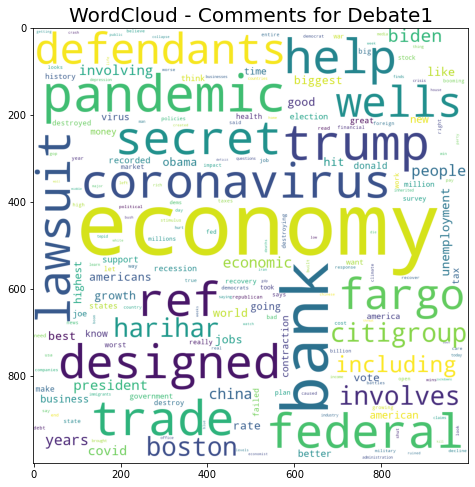

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

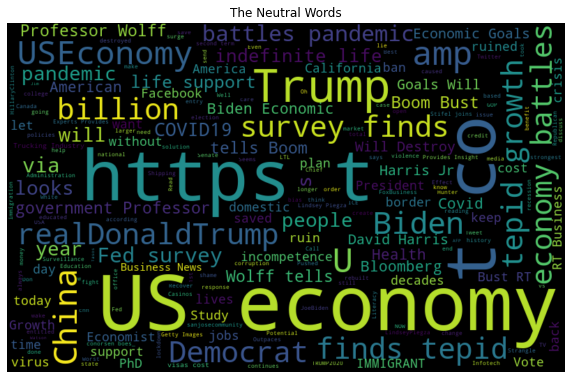

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

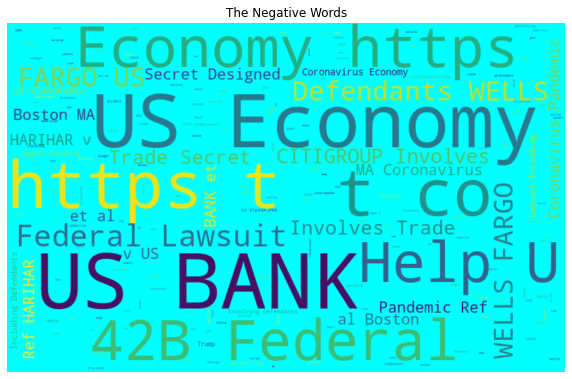

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

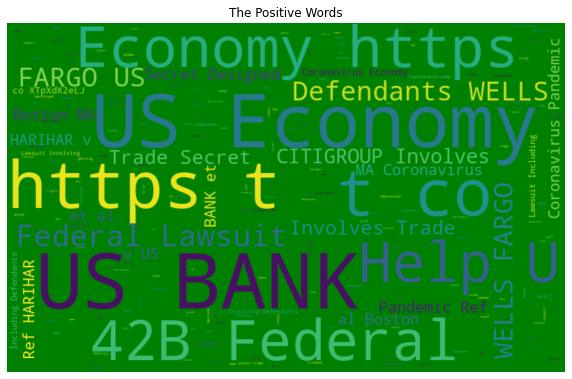

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,@HikindDov @realDonaldTrump What do you want? ...,Positive
1,This election is all about for whom we want th...,Positive
2,Why is sports betting in Florida not legal yet...,Negative
3,Jim Watson/AFP via Getty Images; Tasos Katopod...,Neutral
4,@BowmanNancy @HillaryClinton @dontpanic1955 It...,Neutral
...,...,...
684,Trump boasts the US economy is the best it's e...,Positive
685,@JohnCornyn Voting for @JohnCornyn is like vot...,Negative
686,@MaryBittel @senatemajldr $300??? a week. Reme...,Negative
687,@hotracehorse @barricko_bama @senatemajldr At ...,Negative


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Positive,what do you want four more years of unnecessar...
1,Positive,this election is all about for whom we want th...
2,Negative,why is sports betting in florida not legal yet...
3,Neutral,jim watson afp via getty images tasos katopodi...
4,Neutral,it s always equal to the us economy
...,...,...
684,Positive,trump boasts the us economy is the best it s e...
685,Negative,voting for is like voting for the corona virus...
686,Negative,a week remember what that boost is for mitch t...
687,Negative,bama at least he can afford drugs for his diab...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
0,Positive,what do you want four more years of unnecessar...
1,Positive,this election is all about for whom we want th...
5,Positive,while covid lockdowns are a real threat to kil...
6,Positive,garbage the st he spoke of the virus was in th...
7,Positive,above the law while covid lockdowns are a real...
...,...,...
683,Negative,ajsandoval i m sorry but anyone can have a fin...
685,Negative,voting for is like voting for the corona virus...
686,Negative,a week remember what that boost is for mitch t...
687,Negative,bama at least he can afford drugs for his diab...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
0,1,what do you want four more years of unnecessar...
1,1,this election is all about for whom we want th...
5,1,while covid lockdowns are a real threat to kil...
6,1,garbage the st he spoke of the virus was in th...
7,1,above the law while covid lockdowns are a real...
...,...,...
683,0,ajsandoval i m sorry but anyone can have a fin...
685,0,voting for is like voting for the corona virus...
686,0,a week remember what that boost is for mitch t...
687,0,bama at least he can afford drugs for his diab...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(440, 2)
(147, 2)


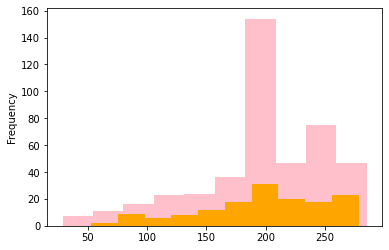

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(164255, 303440)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('built', 0.9372119307518005),
 ('didn', 0.9354543685913086),
 ('says', 0.9301636815071106),
 ('its', 0.9207678437232971),
 ('lost', 0.9192757606506348),
 ('destroyed', 0.9186152219772339),
 ('donald', 0.9184956550598145),
 ('virus', 0.9138904213905334),
 ('fail', 0.9136883616447449),
 ('maga', 0.909116268157959)]

In [37]:
model_w2v.wv.most_similar(negative = "tax")

[('and', -0.38773709535598755),
 ('us', -0.41296452283859253),
 ('economy', -0.4140229821205139),
 ('during', -0.4661104083061218),
 ('wells', -0.46624213457107544),
 ('et', -0.46919184923171997),
 ('pandemic', -0.47003987431526184),
 ('al', -0.47101545333862305),
 ('ma', -0.4738556146621704),
 ('boston', -0.4742146134376526)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(440, 500)
(440,)
(147, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.46258503401360546
F1 score : 0.5269461077844312
[[24 50]
 [29 44]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.564625850340136
f1 score : 0.4074074074074074
[[61 13]
 [51 22]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.29931972789115646
f1 score : 0.1487603305785124
[[35 39]
 [64  9]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9886363636363636
Validation Accuracy : 0.4965986394557823
f1 score : 0.6636363636363637
[[ 0 74]
 [ 0 73]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 but for the wuhan caused pandemic the buffoon in the white house has stood up to china brought hundreds of business back to the us and revived the us economy well beyond anything his predecessor thought possible without a magic wand 

First sample after preprocessing: 
 [ 54  35   2 445 219  12   2 446  10   2 250 220  43 354  76   4  73 188
 355   8 111  91   4   2   1   5 447   2   1   3 153 356 189  64 448 449
 450 297  11 451 452   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
4/4 - 1s - loss: 0.6903 - accuracy: 0.5126 - val_loss: 0.6646 - val_accuracy: 0.5682
Epoch 2/20
4/4 - 0s - loss: 0.6651 - accuracy: 0.5581 - val_loss: 0.6365 - val_accuracy: 0.5682
Epoch 3/20
4/4 - 0s - loss: 0.6378 - accuracy: 0.5581 - val_loss: 0.5967 - val_accuracy: 0.5682
Epoch 4/20
4/4 - 0s - loss: 0.6003 - accuracy: 0.5581 - val_loss: 0.5496 - val_accuracy: 0.5909
Epoch 5/20
4/4 - 0s - loss: 0.5516 - accuracy: 0.5909 - val_loss: 0.4999 - val_accuracy: 0.7045
Epoch 6/20
4/4 - 0s - loss: 0.5032 - accuracy: 0.7854 - val_loss: 0.4577 - val_accuracy: 0.7727
Epoch 7/20
4/4 - 0s - loss: 0.4640 - accuracy: 0.7424 - val_loss: 0.4350 - val_accuracy: 0.7727
Epoch 8/20
4/4 - 0s - loss: 0.4378 - accuracy: 0.7500 - val_loss: 0.4300 - val_accuracy: 0.7500
Epoch 9/20
4/4 - 0s - loss: 0.4222 - accuracy: 0.8687 - val_loss: 0.4247 - val_accuracy: 0.7955
Epoch 10/20
4/4 - 0s - loss: 0.3966 - accuracy: 0.8636 - val_loss: 0.4100 - val_accuracy: 0.7727
Epoch 11/20
4/4 - 0s - loss: 0.3751 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,1,what do you want four more years of unnecessar...
1,1,this election is all about for whom we want th...
2,0,why is sports betting in florida not legal yet...
3,-1,jim watson afp via getty images tasos katopodi...
4,-1,it s always equal to the us economy
...,...,...
684,1,trump boasts the us economy is the best it s e...
685,0,voting for is like voting for the corona virus...
686,0,a week remember what that boost is for mitch t...
687,0,bama at least he can afford drugs for his diab...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(516, 500)
(516,)
(173, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(516, 500)
(173, 500)
(516,)
(173,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.2947976878612717
F1 score : [0.20472441 0.06521739 0.5511811 ]
[[13  0  4]
 [65  3 18]
 [32  3 35]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9941860465116279
Validation Accuracy : 0.23121387283236994
f1 score : [0.18045113 0.11320755 0.41121495]
[[12  2  3]
 [68  6 12]
 [36 12 22]]


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.2658959537572254
f1 score : [0.30952381 0.15384615 0.3164557 ]
[[13  0  4]
 [19  8 59]
 [35 10 25]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8953488372093024
Validation Accuracy : 0.36416184971098264
f1 score : [0.47058824 0.07920792 0.48453608]
[[12  1  4]
 [ 9  4 73]
 [13 10 47]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['you know my take biden is absolutely horrible but trump is the most destructive and dangerous threat to the us economy we ve ever had he gave away us leadership gave it away single worst political decision in the history of the modern world', 'improved quality of life for the lower income via support programs higher spending in the overall economy actual tax increases don t really kick in until m annual income won t impact overall spending much better education bullish for us economy over next y', 'karl rove trump campaign should focus on the economy not hunter biden fox news kinda same thing us economy put on black market by biden', 'us economy s rebound sets up test of fed s new pledge', 'b federal lawsuit involving defendants wells fargo us bank and citigroup involves trade secret designed to help us economy during coronavirus pandemic ref harihar v us bank et al boston ma coronavirus economy', 'b federal lawsuit including defendants wells farg

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
4/4 - 1s - loss: 0.6303 - accuracy: 0.4504 - val_loss: 0.6346 - val_accuracy: 0.4808
Epoch 2/20
4/4 - 1s - loss: 0.5335 - accuracy: 0.4504 - val_loss: 0.6311 - val_accuracy: 0.4808
Epoch 3/20
4/4 - 1s - loss: 0.5014 - accuracy: 0.4504 - val_loss: 0.6598 - val_accuracy: 0.4808
Epoch 4/20
4/4 - 1s - loss: 0.5060 - accuracy: 0.4504 - val_loss: 0.6452 - val_accuracy: 0.4808
Epoch 5/20
4/4 - 1s - loss: 0.4808 - accuracy: 0.4504 - val_loss: 0.6132 - val_accuracy: 0.4808
Epoch 6/20
4/4 - 1s - loss: 0.4701 - accuracy: 0.4504 - val_loss: 0.5947 - val_accuracy: 0.4808
Epoch 7/20
4/4 - 1s - loss: 0.4497 - accuracy: 0.4504 - val_loss: 0.5839 - val_accuracy: 0.4808
Epoch 8/20
4/4 - 1s - loss: 0.4316 - accuracy: 0.4504 - val_loss: 0.5741 - val_accuracy: 0.4808
Epoch 9/20
4/4 - 1s - loss: 0.4022 - accuracy: 0.4504 - val_loss: 0.5688 - val_accuracy: 0.4808
Epoch 10/20
4/4 - 1s - loss: 0.3688 - accuracy: 0.4504 - val_loss: 0.5581 - val_accuracy: 0.4808
Epoch 11/20
4/4 - 1s - loss: 0.3269 - a